In [1]:
#from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.recurrent import LSTM
#from keras.models import Sequential

In [2]:
#pip install phased-lstm-keras

In [3]:
#from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.recurrent import LSTM
#from keras.models import Sequential
#import LSTM, time

In [4]:
#X_train,y_train,X_test,y_test = lstm.load_data('BB.csv',50,True)

In [19]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

In [20]:
AAPLSept2chart = pd.read_csv('AAPL 2011-Sept_2_2021.csv')

In [21]:
AAPLSept2chart.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-09-02,13.383571,13.500000,13.279643,13.358929,11.453481,438939200
1,2011-09-06,13.120357,13.583214,13.088571,13.562143,11.627709,509698000
2,2011-09-07,13.770000,13.771429,13.642857,13.711786,11.756008,350576800
3,2011-09-08,13.657143,13.878929,13.653929,13.719286,11.762436,416158400
4,2011-09-09,13.711786,13.785714,13.393571,13.481429,11.558505,564813200


In [22]:
#df = pd.read_csv(filename)
AAPLSept2chartClosingPrices=AAPLSept2chart[['Date', 'Adj Close']]

In [23]:
AAPLSept2chartClosingPrices.head()

,Date,Adj Close
0,2011-09-02,11.453481
1,2011-09-06,11.627709
2,2011-09-07,11.756008
3,2011-09-08,11.762436
4,2011-09-09,11.558505


In [50]:
#Parsing the strings to datetime format
AAPLSept2chart['Date']=pd.to_datetime(AAPLSept2chart['Date'],infer_datetime_format=True)
indexedAAPLSept2chartClosingPrices=AAPLSept2chartClosingPrices.set_index(['Date'])

In [51]:
#AAPLSept2chart.head()
indexedAAPLSept2chartClosingPrices.head()


,Adj Close
Date,
2011-09-02,11.453481
2011-09-06,11.627709
2011-09-07,11.756008
2011-09-08,11.762436
2011-09-09,11.558505


In [52]:
from datetime import datetime
indexedAAPLSept2chartClosingPrices.head()

,Adj Close
Date,
2011-09-02,11.453481
2011-09-06,11.627709
2011-09-07,11.756008
2011-09-08,11.762436
2011-09-09,11.558505


In [53]:
#printing the tail to make sure
indexedAAPLSept2chartClosingPrices.tail()

,Adj Close
Date,
2021-08-26,147.324982
2021-08-27,148.383453
2021-08-30,152.896851
2021-08-31,151.608734
2021-09-01,152.287735


In [54]:
#Graph 1 (Personal Graph)
#plt.figure(figsize=(25,16))
#plt.plot(AAPLSept2chart['Date'].dropna(),AAPLSept2chart['Adj Close'].dropna(),label='Sept2 Actual')

Text(0.5, 1.0, 'From 2011-09-02 to 2021-09-03')


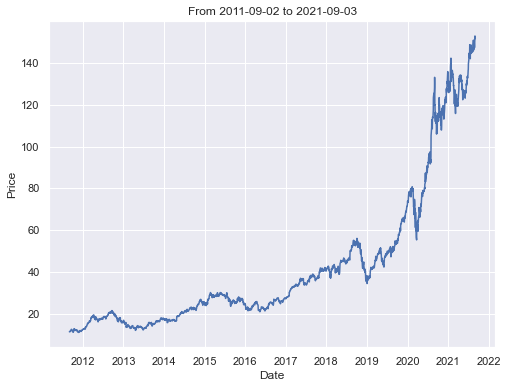

In [55]:
#Graph 2 from Time Series Analysis Forcasting video by Edureka
plt.xlabel("Date")
plt.ylabel("Price")
#plt.figure(figsize=(25,16))
plt.plot(indexedAAPLSept2chartClosingPrices)
print(plt.title("From 2011-09-02 to 2021-09-03"))

In [56]:
#Checking Stationarity (whether the mean at certain points would be similar or the same with mean at other points)
#(whether we viably can use the past data to predict the future)

#Using Rolling Statistic:
#Rolling Mean every 30 days(Example: Mean of price on 2011-09-02 and 2011-10-02)
#Adviced to calcute annually (window=365)
rollingmean=indexedAAPLSept2chartClosingPrices.rolling(window=365).mean()

#Rolling Std every 30 days(Example: Std of price on 2011-09-02 and 2011-10-02)
rollingstd=indexedAAPLSept2chartClosingPrices.rolling(window=365).std()
print(rollingmean,rollingstd)

             Adj Close
Date                  
2011-09-02         NaN
2011-09-06         NaN
2011-09-07         NaN
2011-09-08         NaN
2011-09-09         NaN
...                ...
2021-08-26  114.432782
2021-08-27  114.672438
2021-08-30  114.925738
2021-08-31  115.186021
2021-09-01  115.451460

[2516 rows x 1 columns]             Adj Close
Date                 
2011-09-02        NaN
2011-09-06        NaN
2011-09-07        NaN
2011-09-08        NaN
2011-09-09        NaN
...               ...
2021-08-26  23.798690
2021-08-27  23.698447
2021-08-30  23.611156
2021-08-31  23.489815
2021-09-01  23.359444

[2516 rows x 1 columns]


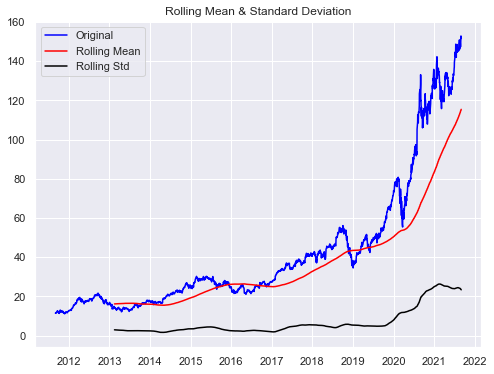

In [57]:
#Plotting Rolling Statistics:
orig = plt.plot(indexedAAPLSept2chartClosingPrices,color='blue',label='Original')
mean = plt.plot(rollingmean,color='red',label='Rolling Mean')
std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [58]:
#From this we can see that both the mean and the std are not constant, and thus the data is not "Stationary" 

In [59]:
#You may also perform the "Dickey-Fuller test to test this: Timestamp{20:18}"
from statsmodels.tsa.stattools import adfuller

print('Results of the Dickey-Fuller Test:')
dftest = adfuller(indexedAAPLSept2chartClosingPrices['Adj Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of the Dickey-Fuller Test:
Test Statistic                    2.732123
p-value                           0.999088
#Lags Used                       27.000000
Number of Observations Used    2488.000000
Critical Value (1%)              -3.432981
Critical Value (5%)              -2.862702
Critical Value (10%)             -2.567389
dtype: float64


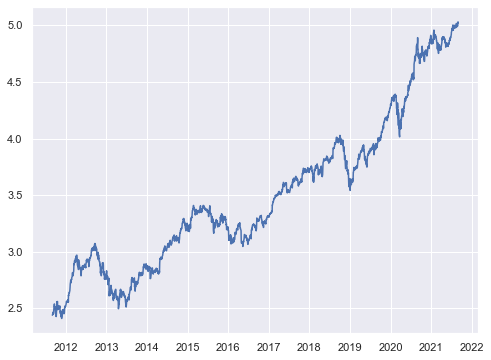

In [60]:
#Estimating the trend
indexedAAPLSept2chartClosingPrices_logScale = np.log(indexedAAPLSept2chartClosingPrices)
plt.plot(indexedAAPLSept2chartClosingPrices_logScale)

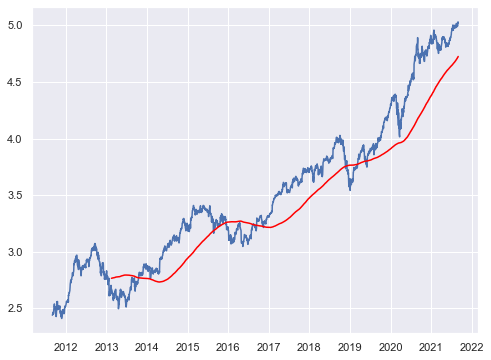

In [61]:
movingAverage=indexedAAPLSept2chartClosingPrices_logScale.rolling(window=365).mean()
movinSTD=indexedAAPLSept2chartClosingPrices_logScale.rolling(window=365).std()
plt.plot(indexedAAPLSept2chartClosingPrices_logScale)
plt.plot(movingAverage, color='red')

In [62]:
datasetLogScaleMinusMovingAverage = indexedAAPLSept2chartClosingPrices_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Removing Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Adj Close
Date,
2013-02-15,-0.104793
2013-02-19,-0.105769
2013-02-20,-0.130784
2013-02-21,-0.137470
2013-02-22,-0.127356
2013-02-25,-0.145761
2013-02-26,-0.132421
2013-02-27,-0.142706
2013-02-28,-0.150247


In [63]:
#Code for ADCF Test (Augmented Dicker Fuller Test)
#To determine if a Time Series is stationary or not
#TimeStamp;{23:58}
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determining rolling statistics
    movingAverage=timeseries.rolling(window=365).mean()
    movingSTD = timeseries.rolling(window=365).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(indexedAAPLSept2chartClosingPrices['Adj Close'], autolag='AIC')#change column name
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

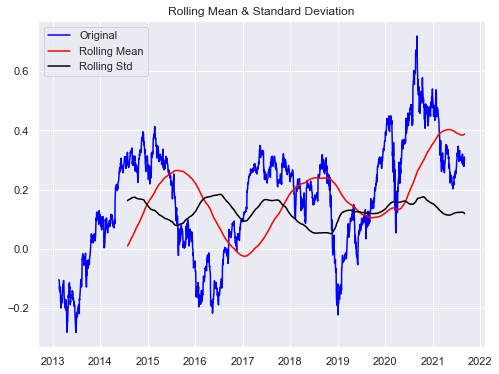

Result of Dickey-Fuller Test:
Test Statistic                    2.732123
p-value                           0.999088
#Lags Used                       27.000000
Number of Observations Used    2488.000000
Critical Value (1%)              -3.432981
Critical Value (5%)              -2.862702
Critical Value (10%)             -2.567389
dtype: float64


In [64]:
test_stationary(datasetLogScaleMinusMovingAverage)

In [65]:
#In the above case, we can see there is no trend
#The p-value is relatively low, as one should expect to see values like 0.99 etc

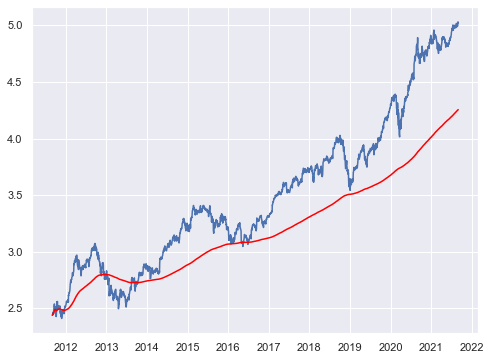

In [66]:
#Calculating weighted average of the time series

#might need to change halflife
exponentialDecayWeightedAverage = indexedAAPLSept2chartClosingPrices_logScale.ewm(halflife=365, min_periods=0, adjust=True).mean()
plt.plot(indexedAAPLSept2chartClosingPrices_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

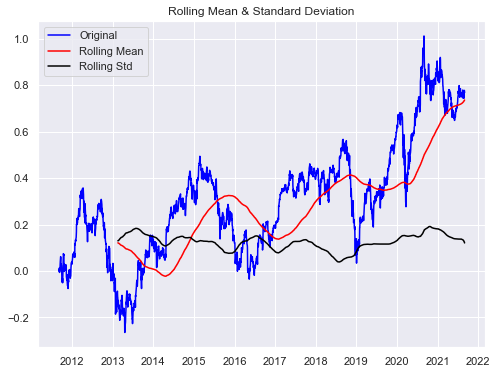

Result of Dickey-Fuller Test:
Test Statistic                    2.732123
p-value                           0.999088
#Lags Used                       27.000000
Number of Observations Used    2488.000000
Critical Value (1%)              -3.432981
Critical Value (5%)              -2.862702
Critical Value (10%)             -2.567389
dtype: float64


In [67]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedAAPLSept2chartClosingPrices_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

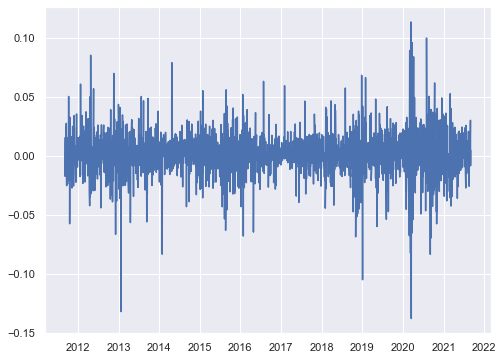

In [68]:
#Shift data to Time-Series so we can use it in forcast
datasetLogDiffShifting = indexedAAPLSept2chartClosingPrices_logScale - indexedAAPLSept2chartClosingPrices_logScale.shift()
plt.plot(datasetLogDiffShifting)


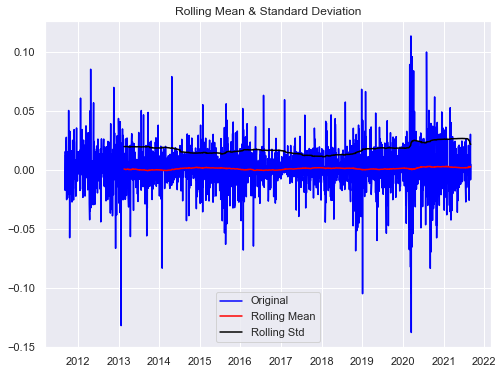

Result of Dickey-Fuller Test:
Test Statistic                    2.732123
p-value                           0.999088
#Lags Used                       27.000000
Number of Observations Used    2488.000000
Critical Value (1%)              -3.432981
Critical Value (5%)              -2.862702
Critical Value (10%)             -2.567389
dtype: float64


In [69]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

In [70]:
#Because the above is flat, we can now say the time series is stationary

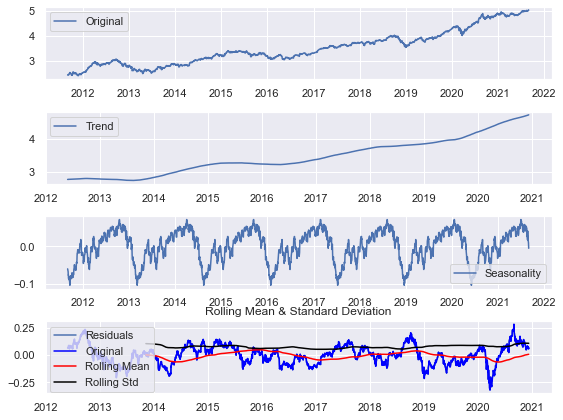

Result of Dickey-Fuller Test:
Test Statistic                    2.732123
p-value                           0.999088
#Lags Used                       27.000000
Number of Observations Used    2488.000000
Critical Value (1%)              -3.432981
Critical Value (5%)              -2.862702
Critical Value (10%)             -2.567389
dtype: float64


In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
#indexedDataset_logScale=indexedAAPLSept2chartClosingPrices_logScale.dropna()#fillna(method='bfill', inplace=True)
decomposition = seasonal_decompose(indexedAAPLSept2chartClosingPrices_logScale,period=365)#indexedDataset_logScale,period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedAAPLSept2chartClosingPrices_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)


In [72]:
#print(indexedAAPLSept2chartClosingPrices_logScale)
#print(indexedDataset_logScale)
#indexedAAPLSept2chartClosingPrices_logScale1=indexedAAPLSept2chartClosingPrices_logScale.ffill()
#print(indexedAAPLSept2chartClosingPrices_logScale1)

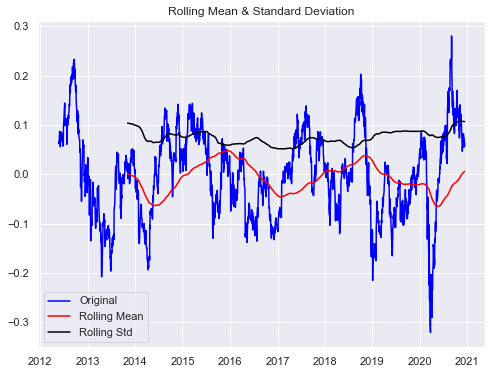

Result of Dickey-Fuller Test:
Test Statistic                    2.732123
p-value                           0.999088
#Lags Used                       27.000000
Number of Observations Used    2488.000000
Critical Value (1%)              -3.432981
Critical Value (5%)              -2.862702
Critical Value (10%)             -2.567389
dtype: float64


In [73]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


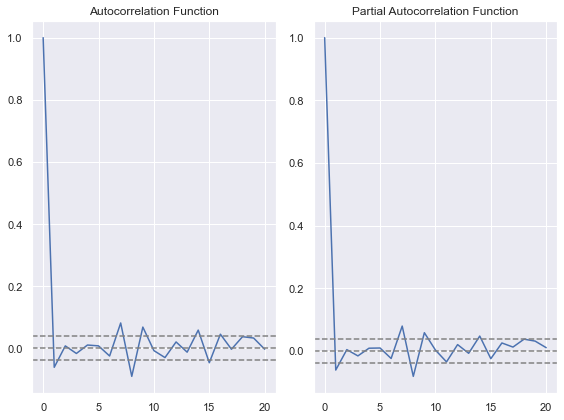

In [75]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')#ols: ordinary least square method

#Plot ACF (AutoCorrelation Graph)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF (Partial AutoCorrelation Graph)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both 

Plotting AR model


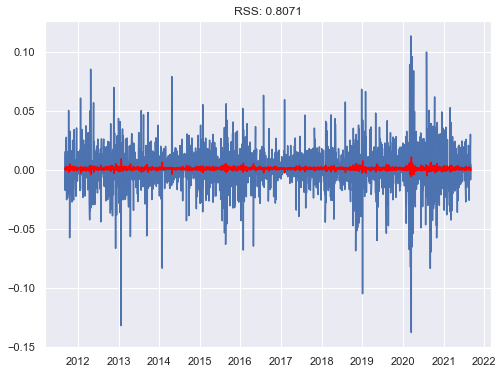

In [95]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL

#ARIMA variables, p is about 1 becuase ACR graph touches 0 at 1, 
#d (differenced data), data was shifted once, thus d=1, 
#finally, q is about 1 becuase PACR graph also touches 0 at 1 
model = ARIMA(indexedAAPLSept2chartClosingPrices_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting["Adj Close"])**2))#Calculating RSS, Residual Sum of Squares
print('Plotting AR model')

#Removing warnings

In [82]:
#The closer to zero the RSS, the better

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


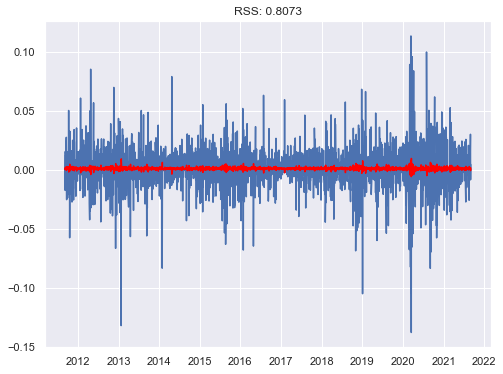

In [92]:

#MA MODEL
model= ARIMA(indexedAAPLSept2chartClosingPrices_logScale, order=(1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting["Adj Close"])**2))
print('Plotting AR model')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

Text(0.5, 1.0, 'RSS: 0.8071')

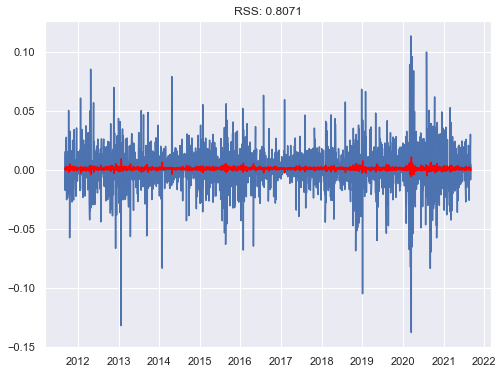

In [130]:
#best
model= ARIMA(indexedAAPLSept2chartClosingPrices_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting["Adj Close"])**2))


In [131]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2011-09-06    0.001028
2011-09-07    0.000158
2011-09-08    0.000478
2011-09-09    0.000977
2011-09-12    0.002085
dtype: float64


In [132]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2011-09-06    0.001028
2011-09-07    0.001186
2011-09-08    0.001665
2011-09-09    0.002641
2011-09-12    0.004726
dtype: float64


In [133]:
predictions_ARIMA_log = pd.Series(indexedAAPLSept2chartClosingPrices_logScale['Adj Close'].iloc[0], index=indexedAAPLSept2chartClosingPrices_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2011-09-02    2.438294
2011-09-06    2.439322
2011-09-07    2.439480
2011-09-08    2.439958
2011-09-09    2.440935
dtype: float64

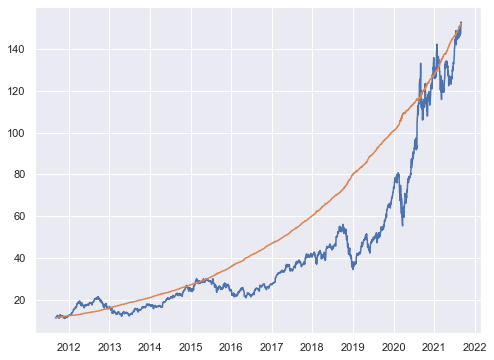

In [134]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedAAPLSept2chartClosingPrices)
plt.plot(predictions_ARIMA)

In [128]:
#indexedAAPLSept2chartClosingPrices_logScale
indexedAAPLSept2chartClosingPrices

,Adj Close
Date,
2011-09-02,11.453481
2011-09-06,11.627709
2011-09-07,11.756008
2011-09-08,11.762436
2011-09-09,11.558505
...,...
2021-08-26,147.324982
2021-08-27,148.383453
2021-08-30,152.896851


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


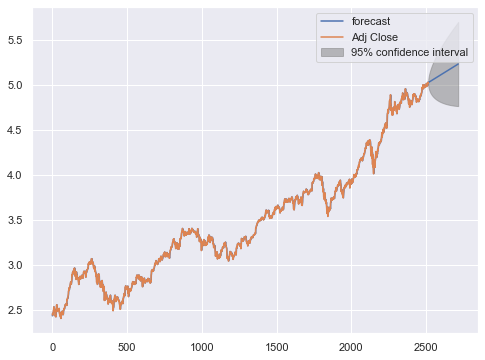

In [148]:
#Results
results_ARIMA.plot_predict(1,2716)#addition of rows(2516) and steps(365)=2881
#indexedAAPLSept2chartClosingPrices.plot_predict(1,2881)#addition of rows(2516) and steps(365)
#results_ARIMA_adjusted=np.exp(results_ARIMA)
x=results_ARIMA.forecast(steps=200)#365 predicting for the next 1 year